In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv('../iris/iris.csv')

data.head(n=10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [33]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


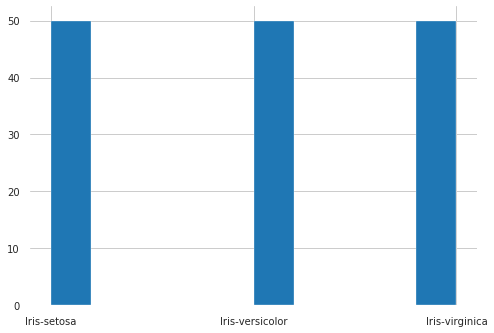

In [34]:
data['Species'].hist()

In [35]:
'''
i.e. 3 classes are equally prevalent in the dataset
'''


'\ni.e. 3 classes are equally prevalent in the dataset\n'

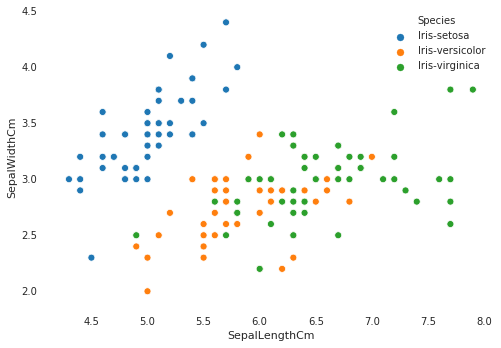

In [36]:
import seaborn as sns

sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=data)

In [40]:
from sklearn.preprocessing import LabelEncoder

X = data.drop(axis=1, columns=['Id', 'Species'])
y = data['Species']

labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(y)

print(X.head())
print(y)


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [89]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

confusion matrix:  [[14  0  0]
 [ 0  8  1]
 [ 0  0  7]]
feature columns Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
feature importance [0.01880092 0.02088991 0.86978623 0.09052294]


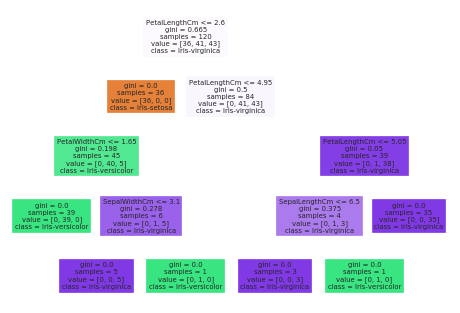

In [93]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_val_pred = clf.predict(X_val)

confusionMatrix = confusion_matrix(y_val, y_val_pred)

print("confusion matrix: ", confusionMatrix)
print("feature columns", X_train.columns)
print("feature importance", clf.feature_importances_)

plot_tree(clf, feature_names=X_train.columns, class_names=data['Species'].unique(), filled=True)
export_graphviz(clf, out_file='tree_viz.svg', rounded=True, precision=2, proportion=False, feature_names=X_train.columns, class_names=data['Species'].unique(), filled=True)

In [68]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)
confusionMatrix = confusion_matrix(y_val, y_val_pred)
print(confusionMatrix)

[[14  0  0]
 [ 0  8  1]
 [ 0  0  7]]


In [76]:
from sklearn.model_selection import GridSearchCV

knnClf = KNeighborsClassifier()
parameters = {
    'n_neighbors': [3, 4, 5, 6, 7]
}
clf = GridSearchCV(knnClf, parameters, 'accuracy')
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)
print(clf.best_params_, clf.best_score_)

confusionMatrix = confusion_matrix(y_val, y_val_pred)
print(confusionMatrix)


{'n_neighbors': 6} 0.9833333333333334
[[14  0  0]
 [ 0  8  1]
 [ 0  0  7]]
